# B - PCA Math, Change of Coordinates

This notebook shows the calculation of the principal components using a toy dataset consisting on a 3D function. The data was selected to show the coordinate transformation done by the method.

Key points:
* Create and plot a function in 3 dimensions $f(x,y,z)$
* Show the PCA algorithm and run it over $f$ to reduce its dimensionality from 3 to 2

## Import libraries

In [1]:
# To have interactive plots
%matplotlib notebook 

# To have static plots
# %matplotlib inline

import numpy
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

numpy.set_printoptions( precision=4, suppress=True )

## Function definition

We start with 3 variables, $x$, $y$ and $z$, where:

$y=sin(x)$

and:

$z=0$

In [27]:
x = numpy.arange( -1, 1, 0.01 )
y = numpy.sin( 7*x )
# y = x**2
z = numpy.zeros_like( x )

These 3 vectors can be seen as part of matrix:

In [28]:
xyz = numpy.stack( [x, y, z] )
print( xyz.shape )

(3, 200)


and this matrix can be rotated in 3D using a rotation matrix:   

  \begin{bmatrix}
  0.5 & 0 & -0.05 \\
  0 & 1 & 0 \\
  0.05 & 0 & 0.5 
  \end{bmatrix}

In [29]:
rm = numpy.array( [ [ 0.5, .3, -0.05 ],
                 [ 0, 1, .3 ],
                 [ 0.05, 0, 0.5 ] ])

New points, rotated in 3D:

In [30]:
points3d = numpy.dot( rm, xyz )

In [31]:
print( 'Dimensions of the original data: ', xyz.shape )
print( 'Dimensions of the rotation matrix: ', rm.shape )
print( 'Dimensions of the rotated data: ', points3d.shape )

Dimensions of the original data:  (3, 200)
Dimensions of the rotation matrix:  (3, 3)
Dimensions of the rotated data:  (3, 200)


## Plot 3D

The following plot can be rotated interactively. It is possible to see that the function is located in a plane, but not aligned to any of the main planes in the coordinate system: $xy$ , $xz$ , $yz$

<IPython.core.display.Javascript object>


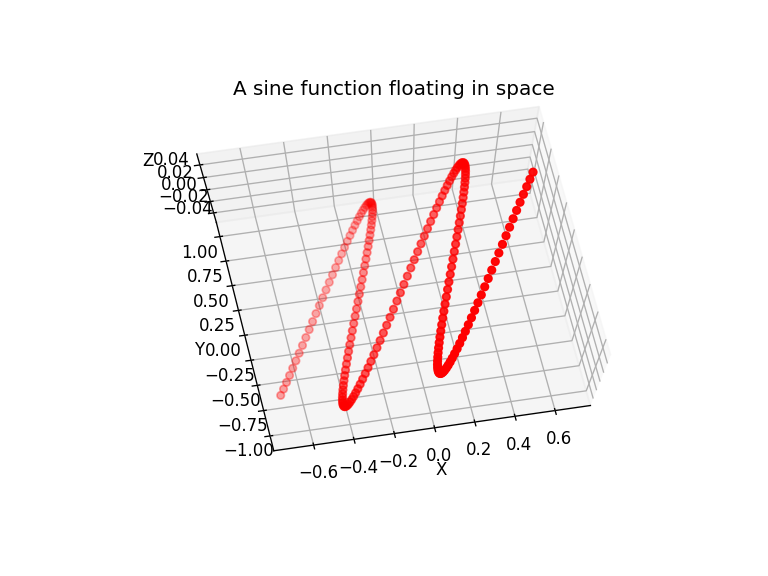

In [32]:
fig = pyplot.figure()
ax = fig.add_subplot(111, projection='3d')

x = points3d[0]
y = points3d[1]
z = points3d[2]

ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

pyplot.title( 'A sine function floating in space' )

pyplot.show()

Our objective is to analyse the `point3d` data table using PCA and reduce its dimensions to 2, representing the plane where the curve is located.

## Principal Component Analysis

### Algorithm

The following workflow defines a PCA:
1. Put your data in a convenient form: $\mathbf{x}=$data
1. Calculate the covariance matrix: $\mathbf{S}=cov(\mathbf{x})$
1. Calculate the eigenvalues and eigenvectors of $\mathbf{S}$: $\mathbf{\lambda}$, $\mathbf{v}$
1. Sort the eigenvalues in descending order: They show the amount of variance explained by the corresponding eigenvector
1. Assign as principal components the ordered eigenvectors
1. Select the number of principal components that account for the most variance
1. Transform the original data to the new coordinate system.

NOTE: If the variables have different ranges and variances, it may be needed to first scale them!

(that would go in step 1)

### Calculation using the covariance matrix and its eigenvalues & eigenvectors

Short reminder...

Variance is the average of the squared differences from the mean: 

$\sigma^2(x)=\frac{1}{n-1} \cdot \Sigma( x_i - \bar{x} )^2$

And the covariance is the formula above, but from 2 vectors, thus not squared but multiplied:
    
$\sigma(x,y)=\frac{1}{n-1} \cdot \Sigma( ( x_i - \bar{x} ) \cdot ( y_i - \bar{y} ) )$

For our points in 3d:

In [8]:
temp = (points3d[0]-points3d[0].mean()) * (points3d[1]-points3d[1].mean())
# temp.mean() # quick, lazy approximated version
temp.sum() / ( points3d.shape[1]-1 ) # good, neat version

0.09273442620490586

(end of the reminder)

***

The library `numpy` has convenient functions to calculate the covariance matrix and the eigenvalues and eigenvectors, as follows:

In [9]:
covariance_matrix = numpy.cov( points3d )
print( covariance_matrix )

[[ 0.0974  0.0927  0.007 ]
 [ 0.0927  0.467  -0.0047]
 [ 0.007  -0.0047  0.0008]]


In [10]:
eigenvalues , eigenvectors = numpy.linalg.eig( covariance_matrix )

print( '*'*50 )
print( 'Eigenvalues (Explained variance)' )
print( eigenvalues )
print( '*'*50 )
print( 'Eigenvectors (Principal Components)' )
print( eigenvectors )
print( '*'*50 )


**************************************************
Eigenvalues (Explained variance)
[ 0.489   0.0762 -0.    ]
**************************************************
Eigenvectors (Principal Components)
[[ 0.2303  0.968  -0.0995]
 [ 0.9731 -0.2285  0.0298]
 [-0.0062  0.1037  0.9946]]
**************************************************


#### Data transformation

Once we found the vectors (ordered!), we can transform the data to a new coordinate system.

Notice that the last eigenvalue is 0. We expect the transformed data to have the same dimensions (3), but very small values in the last one. We can then decide to take just the first 2.

In [11]:
projected_data = numpy.dot( points3d.T, eigenvectors ).T
# projected_data # uncomment to show the numerical result

#### Plot

<IPython.core.display.Javascript object>


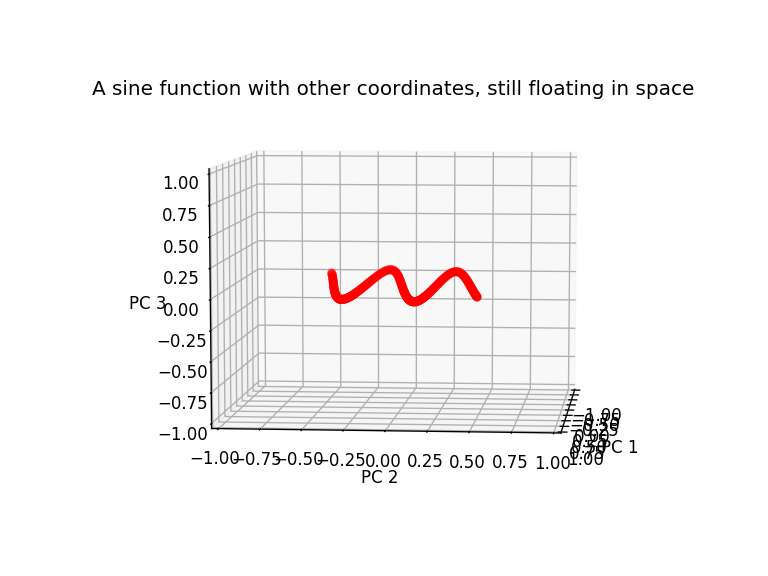

In [12]:
fig = pyplot.figure()
ax = fig.add_subplot(111, projection='3d')

x = projected_data[0]
y = projected_data[1]
z = projected_data[2]

ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')

ax.set_xlim( [-1,1] )
ax.set_ylim( [-1,1] )
ax.set_zlim( [-1,1] )

pyplot.title( 'A sine function with other coordinates, still floating in space' )

pyplot.show()

### Implementation using python and scikit-learn

In python, the library `scikit-learn`, also known as sklearn includes a decomposition module with an implementation of the PCA algorithm. It carries out the previously shown procedure, but it also takes care of sorting the pincipal components and provides access to the explained variance directly.

In [13]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA()
pca = pca.fit( points3d.T  ) # The function expects variables to be rows!

To get the (sorted) eigenvectors:

In [15]:
pca.components_

array([[ 0.2303,  0.9731, -0.0062],
       [-0.968 ,  0.2285, -0.1037],
       [-0.0995,  0.0298,  0.9946]])

And the eigenvalues of the covariance matrix:

In [16]:
pca.explained_variance_

array([0.489 , 0.0762, 0.    ])

In [17]:
pca.explained_variance_ratio_

array([0.8651, 0.1349, 0.    ])

Lastly, we can project to the new coordinate system using `pca.transform`:

In [18]:
projected_data = pca.transform( points3d.T ).T
print( projected_data.shape )
# projected_data # uncomment to show the numerical result

(3, 200)


If we take the fist two columns of this transformed data, we get our function with all information in it, in only 2 dimensions>

<IPython.core.display.Javascript object>


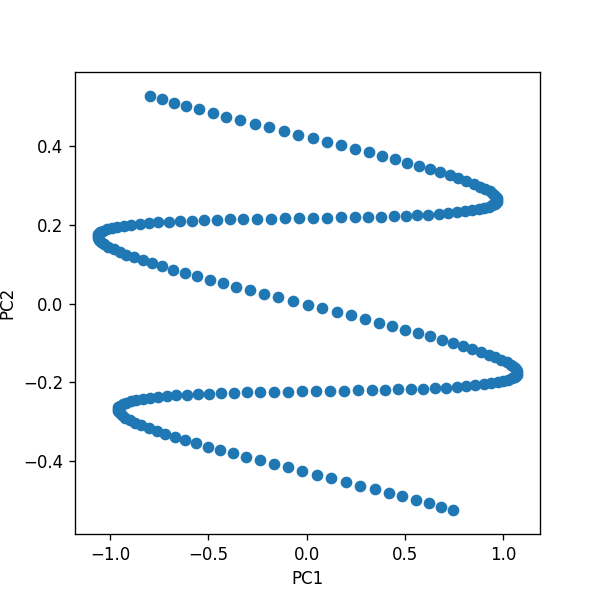

In [19]:
fig, ax = pyplot.subplots( figsize=(5,5) )

ax.scatter( projected_data[0], projected_data[1] )

ax.set_xlabel( 'PC1' )
ax.set_ylabel( 'PC2' )

pyplot.show()


We can confirm that the last component only includes some noise:

(notice the units in y)

<IPython.core.display.Javascript object>


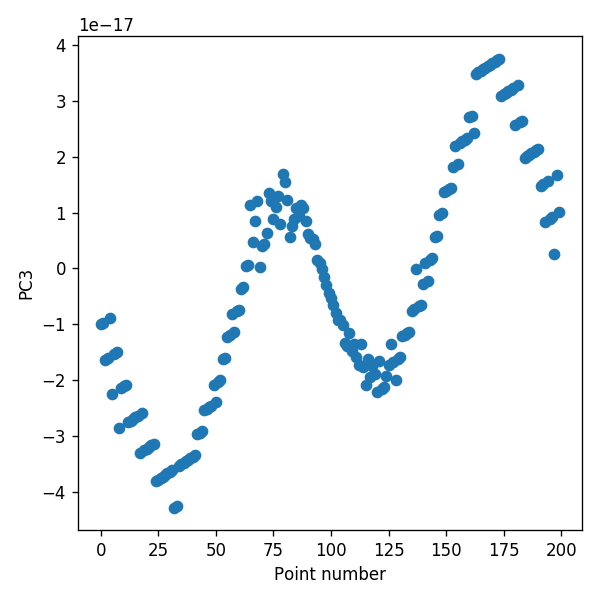

In [20]:
fig, ax = pyplot.subplots( figsize=(5,5) )

ax.plot( projected_data[2], linewidth=0, marker='o' )

ax.set_xlabel( 'Point number' )
ax.set_ylabel( 'PC3' )

# ax.set_ylim( [-1,1] ) # Uncomment to set limits in the y-axis

pyplot.tight_layout()
pyplot.show()
